# 01 - Explore Datasets

In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = 'data/'

## Sequence Classification - Monitors

In [2]:
# load the data and combine them into one dataframe
csv_files = ['monitors_classification_202107_train.csv', 'monitors_classification_202107_val.csv',
             'monitors_classification_202107_test.csv']
_dfs = []
for filename in csv_files:
    _df = pd.read_csv(DATA_DIR + filename)
    _df['split'] = filename.replace('.csv', '').split('_')[-1]
    _dfs.append(_df)
clf_df = pd.concat(_dfs)

# decode metadata from string to dictionary
clf_df['metadata'] = clf_df['metadata'].apply(lambda x: json.loads(x.replace('\'', '"')))
clf_df['region'] = clf_df['metadata'].apply(lambda d: d.get('Region', 'N/A'))
clf_df['country'] = clf_df['metadata'].apply(lambda d: d.get('Country', 'N/A'))

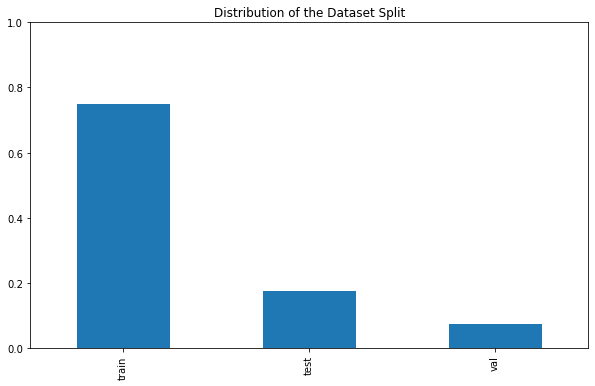

In [3]:
ax = (clf_df['split'].value_counts() / len(clf_df)).plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Dataset Split', ylim=[0, 1])
plt.show()

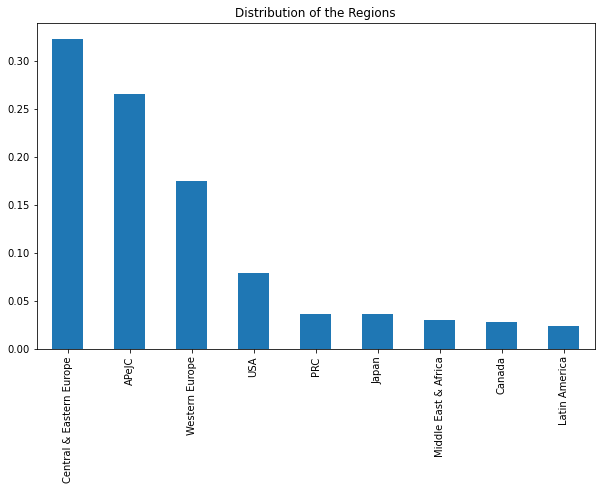

In [4]:
ax = (clf_df['region'].value_counts() / len(clf_df)).plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Regions')
plt.show()

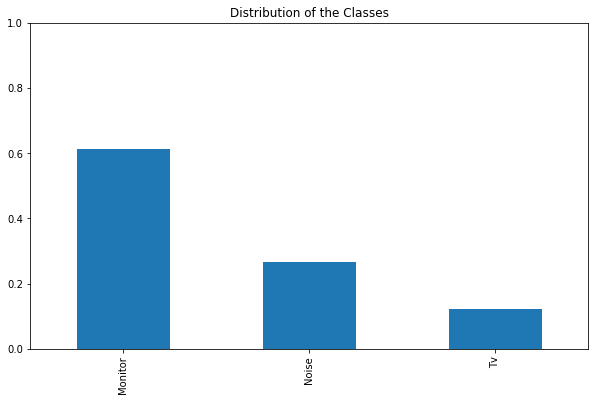

In [5]:
ax = (clf_df['trg'].value_counts() / len(clf_df)).plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Classes', ylim=[0, 1])
plt.show()

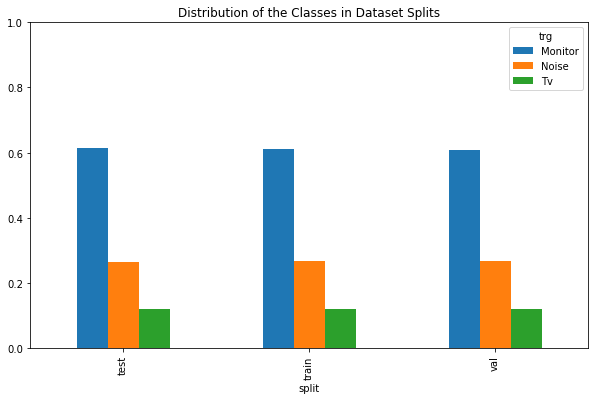

In [6]:
_df = clf_df.groupby(['split']).apply(lambda g: g['trg'].value_counts() / len(g))
ax = _df.plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Classes in Dataset Splits', ylim=[0, 1])
plt.show()

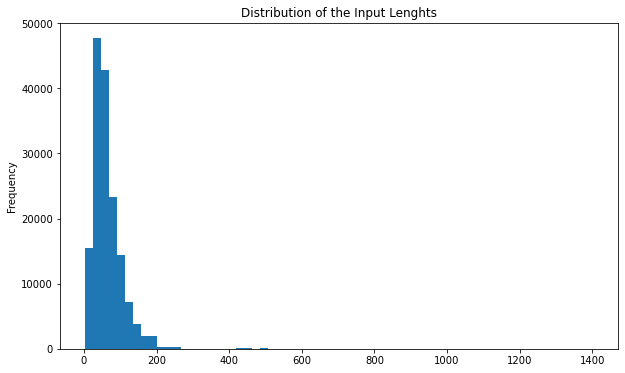

Max Input Length: 1401.0


In [7]:
ax = clf_df['inp'].str.len().plot(kind='hist', bins=64, figsize=(10, 6))
ax.set(title='Distribution of the Input Lenghts')
plt.show()

print('Max Input Length:', clf_df['inp'].str.len().max())

## Sequence Translation - Monitors and Printers

In [8]:
# load the data and combine them into one dataframe
csv_files = ['monitors_translation_202107_train.csv', 'monitors_translation_202107_val.csv',
             'monitors_translation_202107_test.csv', 'printers_translation_202107_train.csv',
             'printers_translation_202107_val.csv', 'printers_translation_202107_test.csv']
_dfs = []
for filename in csv_files:
    _df = pd.read_csv(DATA_DIR + filename)
    _df['split'] = filename.replace('.csv', '').split('_')[-1]
    _df['type'] = filename.split('_')[0]
    _dfs.append(_df)
trans_df = pd.concat(_dfs)

# decode metadata from string to dictionary
trans_df['metadata'] = trans_df['metadata'].apply(lambda x: json.loads(x.replace('\'', '"')))
trans_df['region'] = trans_df['metadata'].apply(lambda d: d.get('Region', 'N/A'))
trans_df['country'] = trans_df['metadata'].apply(lambda d: d.get('Country', 'N/A'))

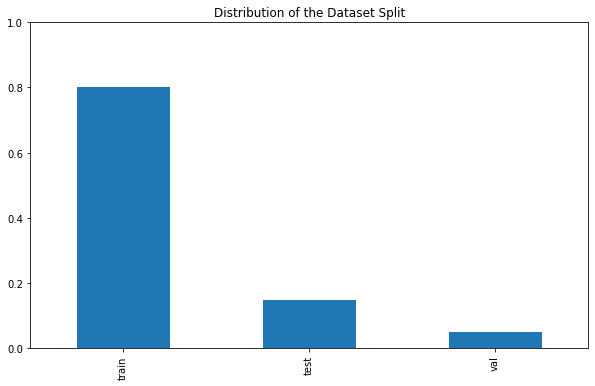

In [9]:
ax = (trans_df['split'].value_counts() / len(trans_df)).plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Dataset Split', ylim=[0, 1])
plt.show()

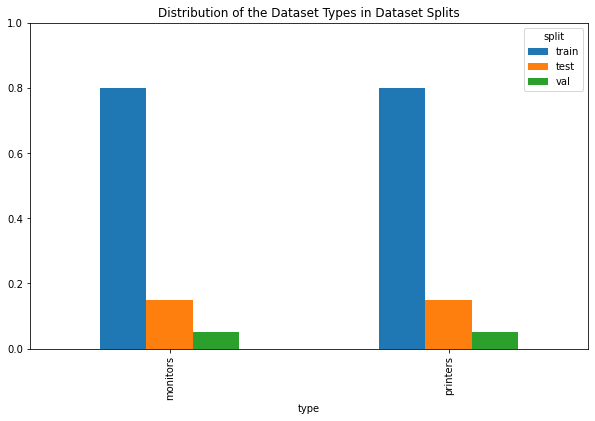

In [10]:
_df = trans_df.groupby(['type']).apply(lambda g: g['split'].value_counts() / len(g))
ax = _df.plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Dataset Types in Dataset Splits', ylim=[0, 1])
plt.show()

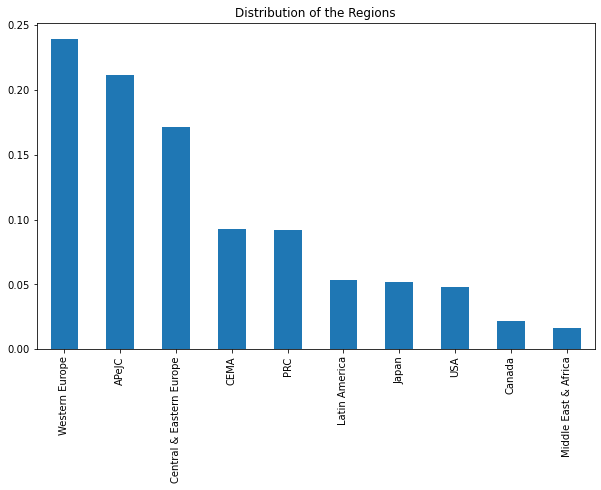

In [11]:
ax = (trans_df['region'].value_counts() / len(trans_df)).plot(kind='bar', figsize=(10, 6))
ax.set(title='Distribution of the Regions')
plt.show()

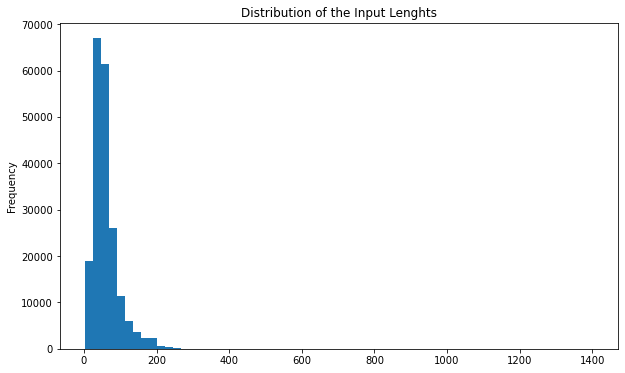

Max Input Length: 1401


In [12]:
ax = trans_df['inp'].str.len().plot(kind='hist', bins=64, figsize=(10, 6))
ax.set(title='Distribution of the Input Lenghts')
plt.show()

print('Max Input Length:', trans_df['inp'].str.len().max())

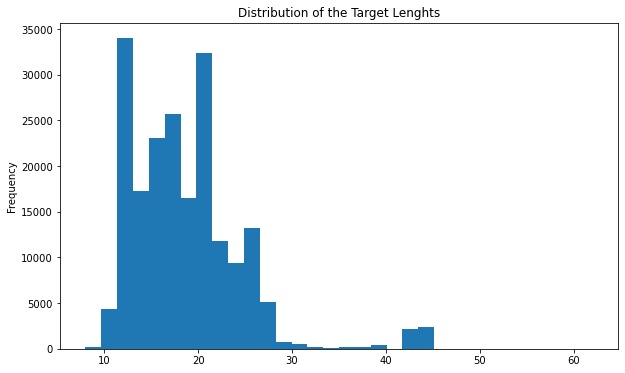

Max Target Length: 62


In [13]:
ax = trans_df['trg'].str.len().plot(kind='hist', bins=32, figsize=(10, 6))
ax.set(title='Distribution of the Target Lenghts')
plt.show()

print('Max Target Length:', trans_df['trg'].str.len().max())